In [9]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
df = pd.read_csv('../data/wine.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [23]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [24]:
df = df.sample(frac=1) # sample 메서드
df.head(10)
# frac=1 : 100%

,0,1,2,3,4,5,6,7,8,9,10,11,12
5142,6.0,0.330,0.20,1.80,0.031,49.0,159.0,0.99190,3.41,0.53,11.0,6,0
3851,7.2,0.290,0.20,7.70,0.046,51.0,174.0,0.99582,3.16,0.52,9.5,5,0
5047,6.7,0.470,0.29,4.75,0.034,29.0,134.0,0.99056,3.29,0.46,13.0,7,0
1431,7.6,0.430,0.31,2.10,0.069,13.0,74.0,0.99580,3.26,0.54,9.9,6,1
1307,6.8,0.680,0.09,3.90,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4,1
1765,8.4,0.270,0.46,8.70,0.048,39.0,197.0,0.99740,3.14,0.59,9.6,6,0
6269,6.6,0.285,0.49,11.40,0.035,57.0,137.0,0.99732,3.08,0.54,8.9,6,0
1132,7.4,0.360,0.34,1.80,0.075,18.0,38.0,0.99330,3.38,0.88,13.6,7,1
3595,7.0,0.280,0.33,14.60,0.043,47.0,168.0,0.99940,3.34,0.67,8.8,6,0
1093,9.2,0.310,0.36,2.20,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,7,1


In [26]:
df = pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=1)
df.index = range(len(df))
df.head(20)
# 뒤바뀐 random 샘플을 다시 인덱스 번호 0부터 df 길이까지 순서대로 붙인 것

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,6.0,0.190,0.29,1.10,0.047,67.0,152.0,0.99160,3.54,0.59,11.1,7,0
1,6.6,0.240,0.30,13.00,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6,0
2,7.2,0.210,0.36,15.70,0.045,68.0,183.0,0.99922,3.25,0.76,9.4,5,0
3,6.7,0.200,0.24,6.50,0.044,28.0,100.0,0.99348,3.12,0.33,10.2,6,0
4,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.1,7,0
5,6.9,0.290,0.23,8.60,0.056,56.0,215.0,0.99670,3.17,0.44,8.8,5,0
6,8.2,0.730,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,1
7,6.8,0.210,0.49,14.50,0.060,50.0,170.0,0.99910,3.55,0.44,9.8,6,0
8,6.3,0.270,0.25,5.80,0.038,52.0,155.0,0.99500,3.28,0.38,9.4,6,0
9,7.3,0.155,0.49,1.30,0.039,34.0,136.0,0.99260,3.14,0.77,10.5,6,0


In [ ]:
'''
문제] wine 데이터 셋을 이용하여 학습을 수행하고 모델 성능을 평가하는 코드를 작성하세요.
'''

In [8]:
df = pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=1)
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True,
                                random_state=seed)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=200, batch_size=50, verbose=0)

# History: fit의 결과

In [9]:
# 이 때의 model은 무조건 200번째 epoch 모델
result1 = model.evaluate(X_train, Y_train, verbose=0)
result2 = model.evaluate(X_test, Y_test, verbose=0)

print('모델 학습 성능 평가:', result1)
print('모델 검증 성능 평가:', result2)

모델 학습 성능 평가: [0.03931538015604019, 0.9874927997589111]
모델 검증 성능 평가: [0.039354950189590454, 0.9884615540504456]


In [ ]:
# 모델 업데이트하기

In [11]:
model_dir = './model/'

if not os.path.exists(model_dir):
    os.mkdir(model_dir) # make directory: 폴더 생성

# model 폴더가 없었으므로 새로 생김

In [ ]:
# 형식 문자 지정 방식
# 1) 퍼센트
# 2) 포맷 - 1) 인덱스 2) 키워드

In [16]:
print(model_dir + '{0:03d}-{1:.4f}.hdf5'.format(5, 0.583745))

# model 폴더에 저장되는 파일의 이름 지정
# 포맷 메서드 - 인덱스 방식

./model/05-0.5837.hdf5


In [17]:
# 포맷 메서드 - 키워드 방식
# keyword 기반 format 메서드

print(model_dir + '{epoch:03d}-{val_loss:.4f}.hdf5'.format(epoch=5, val_loss=0.583745))


./model/005-0.5837.hdf5


In [19]:
model_path = './model/{epoch:03d}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=1)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=200, batch_size=50, callbacks=[checkpointer])

# callbacks 지정하면 저장 가능

Epoch 1/200
104/104 [==============================] - 1s 2ms/step - loss: 0.2622 - accuracy: 0.9051

Epoch 00001: saving model to ./model\001.hdf5
Epoch 2/200
104/104 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9334

Epoch 00002: saving model to ./model\002.hdf5
Epoch 3/200
104/104 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9340

Epoch 00003: saving model to ./model\003.hdf5
Epoch 4/200
104/104 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9396

Epoch 00004: saving model to ./model\004.hdf5
Epoch 5/200
104/104 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9430

Epoch 00005: saving model to ./model\005.hdf5
Epoch 6/200
104/104 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9434

Epoch 00006: saving model to ./model\006.hdf5
Epoch 7/200
104/104 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9479

Epoch 0000

104/104 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9869

Epoch 00109: saving model to ./model\109.hdf5
Epoch 110/200
104/104 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9869

Epoch 00110: saving model to ./model\110.hdf5
Epoch 111/200
104/104 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9892

Epoch 00111: saving model to ./model\111.hdf5
Epoch 112/200
104/104 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9856

Epoch 00112: saving model to ./model\112.hdf5
Epoch 113/200
104/104 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9873

Epoch 00113: saving model to ./model\113.hdf5
Epoch 114/200
104/104 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9856

Epoch 00114: saving model to ./model\114.hdf5
Epoch 115/200
104/104 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9846

Epoch 0011

104/104 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9900

Epoch 00163: saving model to ./model\163.hdf5
Epoch 164/200
104/104 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9904

Epoch 00164: saving model to ./model\164.hdf5
Epoch 165/200
104/104 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9883

Epoch 00165: saving model to ./model\165.hdf5
Epoch 166/200
104/104 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9873

Epoch 00166: saving model to ./model\166.hdf5
Epoch 167/200
104/104 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9863: 0s - loss: 0.0509 - accuracy: 

Epoch 00167: saving model to ./model\167.hdf5
Epoch 168/200
104/104 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9906

Epoch 00168: saving model to ./model\168.hdf5
Epoch 169/200
104/104 [==============================] - 0s 2ms/step - loss: 0.042

In [ ]:
# monitor: acc 학습 정확도, loss 학습 손실도, val_acc 검증 정확도, val_loss 검증 손실도

In [20]:
model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50)

# 80%만 이용해서 학습 수행, 검증 데이터 나머지 20
# validation_split 지정해서 val_loss, val_acc 확인 가능
# 이제 파일명에 val_loss 지정 가능

Epoch 1/200
84/84 [==============================] - 2s 6ms/step - loss: 0.2408 - accuracy: 0.9124 - val_loss: 0.2266 - val_accuracy: 0.9212
Epoch 2/200
84/84 [==============================] - 0s 4ms/step - loss: 0.1974 - accuracy: 0.9283 - val_loss: 0.2141 - val_accuracy: 0.9231
Epoch 3/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9293 - val_loss: 0.2319 - val_accuracy: 0.9240
Epoch 4/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1826 - accuracy: 0.9341 - val_loss: 0.2120 - val_accuracy: 0.9250
Epoch 5/200
84/84 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9382 - val_loss: 0.2068 - val_accuracy: 0.9317
Epoch 6/200
84/84 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.93 - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9394 - val_loss: 0.1904 - val_accuracy: 0.9298
Epoch 7/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1666 - accuracy: 0.9413 - val_loss: 0

84/84 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9875 - val_loss: 0.0889 - val_accuracy: 0.9769
Epoch 116/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9868 - val_loss: 0.0902 - val_accuracy: 0.9750
Epoch 117/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0947 - val_accuracy: 0.9769
Epoch 118/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9868 - val_loss: 0.0999 - val_accuracy: 0.9712
Epoch 119/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9868 - val_loss: 0.0913 - val_accuracy: 0.9740
Epoch 120/200
84/84 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.98 - 0s 5ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.1354 - val_accuracy: 0.9587
Epoch 121/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9868 - val_loss: 0

In [21]:
model_path = './model/{epoch:03d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50, callbacks=[checkpointer])

# acc, loss는 신뢰할 수 없음
# val_acc: 분류 모델 O, 회귀 모델 X, val_loss: 전부 가능
# val_acc, val_loss 사용하려면 반드시 validation_split 필요
# validation_split 있어야 validation 되고 키워드 사용 가능

Epoch 1/200
84/84 [==============================] - 1s 8ms/step - loss: 0.2958 - accuracy: 0.9035 - val_loss: 0.2432 - val_accuracy: 0.9221

Epoch 00001: saving model to ./model\001-0.2432.hdf5
Epoch 2/200
84/84 [==============================] - 0s 4ms/step - loss: 0.2072 - accuracy: 0.9334 - val_loss: 0.2151 - val_accuracy: 0.9260

Epoch 00002: saving model to ./model\002-0.2151.hdf5
Epoch 3/200
84/84 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9326 - val_loss: 0.2099 - val_accuracy: 0.9279

Epoch 00003: saving model to ./model\003-0.2099.hdf5
Epoch 4/200
84/84 [==============================] - 1s 7ms/step - loss: 0.1820 - accuracy: 0.9403 - val_loss: 0.2216 - val_accuracy: 0.9221

Epoch 00004: saving model to ./model\004-0.2216.hdf5
Epoch 5/200
84/84 [==============================] - 0s 4ms/step - loss: 0.1726 - accuracy: 0.9408 - val_loss: 0.2021 - val_accuracy: 0.9365

Epoch 00005: saving model to ./model\005-0.2021.hdf5
Epoch 6/200
84/84 [======

Epoch 43/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9824 - val_loss: 0.0959 - val_accuracy: 0.9712

Epoch 00043: saving model to ./model\043-0.0959.hdf5
Epoch 44/200
84/84 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9796 - val_loss: 0.0815 - val_accuracy: 0.9760

Epoch 00044: saving model to ./model\044-0.0815.hdf5
Epoch 45/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9851 - val_loss: 0.1060 - val_accuracy: 0.9692

Epoch 00045: saving model to ./model\045-0.1060.hdf5
Epoch 46/200
84/84 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9815 - val_loss: 0.0917 - val_accuracy: 0.9750

Epoch 00046: saving model to ./model\046-0.0917.hdf5
Epoch 47/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9822 - val_loss: 0.0806 - val_accuracy: 0.9769

Epoch 00047: saving model to ./model\047-0.0806.hdf5
Epoch 48/200
84/84 [

Epoch 85/200
84/84 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9829 - val_loss: 0.0899 - val_accuracy: 0.9750

Epoch 00085: saving model to ./model\085-0.0899.hdf5
Epoch 86/200
84/84 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.9836 - val_loss: 0.0892 - val_accuracy: 0.9750

Epoch 00086: saving model to ./model\086-0.0892.hdf5
Epoch 87/200
84/84 [==============================] - 0s 6ms/step - loss: 0.0503 - accuracy: 0.9863 - val_loss: 0.0885 - val_accuracy: 0.9750

Epoch 00087: saving model to ./model\087-0.0885.hdf5
Epoch 88/200
84/84 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9844 - val_loss: 0.0835 - val_accuracy: 0.9808

Epoch 00088: saving model to ./model\088-0.0835.hdf5
Epoch 89/200
84/84 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9860 - val_loss: 0.1067 - val_accuracy: 0.9740

Epoch 00089: saving model to ./model\089-0.1067.hdf5
Epoch 90/200
84/84 [


Epoch 00126: saving model to ./model\126-0.0803.hdf5
Epoch 127/200
84/84 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9892 - val_loss: 0.1187 - val_accuracy: 0.9683

Epoch 00127: saving model to ./model\127-0.1187.hdf5
Epoch 128/200
84/84 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9877 - val_loss: 0.1052 - val_accuracy: 0.9740

Epoch 00128: saving model to ./model\128-0.1052.hdf5
Epoch 129/200
84/84 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9889 - val_loss: 0.0848 - val_accuracy: 0.9808

Epoch 00129: saving model to ./model\129-0.0848.hdf5
Epoch 130/200
84/84 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9868 - val_loss: 0.0830 - val_accuracy: 0.9769

Epoch 00130: saving model to ./model\130-0.0830.hdf5
Epoch 131/200
84/84 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0837 - val_accuracy: 0.9769

Epoch 00131: s

In [ ]:
# save_best_only=True 지정해서 더 나은 모델만 저장

In [28]:
df = pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=1)
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True,
                                random_state=seed)

model_path = './model/{epoch:03d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                               save_best_only=True, verbose=0)


model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, validation_split=0.2,
          epochs=200, batch_size=50, verbose=0, callbacks=[checkpointer])


In [29]:
# 전체 중 마지막, 200번째 모델
final_result1 = model.evaluate(X_train, Y_train, verbose=0)
final_result2 = model.evaluate(X_test, Y_test, verbose=0)

print('final_result1:', final_result1)
print('final_result2:', final_result2)

final_result1: [0.03770720213651657, 0.9919183850288391]
final_result2: [0.04553452506661415, 0.9853846430778503]


In [30]:
# 마지막 베스트 모델
best_model = load_model('./model/058-0.0647.hdf5')

best_result1 = best_model.evaluate(X_train, Y_train, verbose=0)
best_result2 = best_model.evaluate(X_test, Y_test, verbose=0)

print('best_result1:', best_result1)
print('best_result2:', best_result2)

best_result1: [0.04884763062000275, 0.9874927997589111]
best_result2: [0.041110895574092865, 0.986923098564148]


In [ ]:
# History에 저장하기

In [2]:
df = pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=0.15)

dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=50)

Epoch 1/3500
16/16 [==============================] - 1s 19ms/step - loss: 0.4446 - accuracy: 0.7615 - val_loss: 0.3594 - val_accuracy: 0.7949
Epoch 2/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.3044 - accuracy: 0.8462 - val_loss: 0.3141 - val_accuracy: 0.9026
Epoch 3/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2926 - accuracy: 0.9077 - val_loss: 0.3124 - val_accuracy: 0.9077
Epoch 4/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.9192 - val_loss: 0.2945 - val_accuracy: 0.9179
Epoch 5/3500
16/16 [==============================] - 0s 5ms/step - loss: 0.2626 - accuracy: 0.9205 - val_loss: 0.2970 - val_accuracy: 0.9026
Epoch 6/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2462 - accuracy: 0.9179 - val_loss: 0.2780 - val_accuracy: 0.9231
Epoch 7/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.9256 - val_loss: 0.2590 - val_accuracy: 0.9282
Epoch

16/16 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.9885 - val_loss: 0.1914 - val_accuracy: 0.9487
Epoch 116/3500
16/16 [==============================] - 0s 5ms/step - loss: 0.0585 - accuracy: 0.9872 - val_loss: 0.2351 - val_accuracy: 0.9385
Epoch 117/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9859 - val_loss: 0.1846 - val_accuracy: 0.9590
Epoch 118/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9885 - val_loss: 0.1857 - val_accuracy: 0.9641
Epoch 119/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9910 - val_loss: 0.1822 - val_accuracy: 0.9590
Epoch 120/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9910 - val_loss: 0.2327 - val_accuracy: 0.9385
Epoch 121/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9769 - val_loss: 0.2428 - val_accuracy: 0.9385
Epoch 1

Epoch 172/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9910 - val_loss: 0.1815 - val_accuracy: 0.9590
Epoch 173/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9910 - val_loss: 0.1687 - val_accuracy: 0.9641
Epoch 174/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9859 - val_loss: 0.1578 - val_accuracy: 0.9641
Epoch 175/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9910 - val_loss: 0.1953 - val_accuracy: 0.9487
Epoch 176/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9923 - val_loss: 0.2103 - val_accuracy: 0.9436
Epoch 177/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9910 - val_loss: 0.1710 - val_accuracy: 0.9641
Epoch 178/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9910 - val_loss: 0.1755 - val_accuracy:

Epoch 285/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9910 - val_loss: 0.1547 - val_accuracy: 0.9641
Epoch 286/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9910 - val_loss: 0.1601 - val_accuracy: 0.9641
Epoch 287/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9936 - val_loss: 0.1702 - val_accuracy: 0.9590
Epoch 288/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9923 - val_loss: 0.1784 - val_accuracy: 0.9590
Epoch 289/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9923 - val_loss: 0.1939 - val_accuracy: 0.9590
Epoch 290/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9949 - val_loss: 0.1520 - val_accuracy: 0.9641
Epoch 291/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9923 - val_loss: 0.1800 - val_accuracy:

Epoch 342/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9885 - val_loss: 0.1775 - val_accuracy: 0.9538
Epoch 343/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.2267 - val_accuracy: 0.9590
Epoch 344/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9949 - val_loss: 0.1556 - val_accuracy: 0.9590
Epoch 345/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9949 - val_loss: 0.1891 - val_accuracy: 0.9590
Epoch 346/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9936 - val_loss: 0.2010 - val_accuracy: 0.9590
Epoch 347/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9936 - val_loss: 0.2082 - val_accuracy: 0.9590
Epoch 348/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9949 - val_loss: 0.1595 - val_accuracy:

Epoch 399/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.2091 - val_accuracy: 0.9590
Epoch 400/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9923 - val_loss: 0.2293 - val_accuracy: 0.9538
Epoch 401/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9936 - val_loss: 0.1766 - val_accuracy: 0.9590
Epoch 402/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.2092 - val_accuracy: 0.9590
Epoch 403/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.2164 - val_accuracy: 0.9590
Epoch 404/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9962 - val_loss: 0.1714 - val_accuracy: 0.9641
Epoch 405/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.2168 - val_accuracy:

Epoch 512/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9949 - val_loss: 0.1808 - val_accuracy: 0.9641
Epoch 513/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.2480 - val_accuracy: 0.9590
Epoch 514/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9910 - val_loss: 0.2253 - val_accuracy: 0.9590
Epoch 515/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9949 - val_loss: 0.2298 - val_accuracy: 0.9590
Epoch 516/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9936 - val_loss: 0.2152 - val_accuracy: 0.9538
Epoch 517/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.2844 - val_accuracy: 0.9590
Epoch 518/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.2877 - val_accuracy:

Epoch 569/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.2734 - val_accuracy: 0.9590
Epoch 570/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.2471 - val_accuracy: 0.9590
Epoch 571/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9949 - val_loss: 0.1991 - val_accuracy: 0.9641
Epoch 572/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9962 - val_loss: 0.3178 - val_accuracy: 0.9590
Epoch 573/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9910 - val_loss: 0.2639 - val_accuracy: 0.9590
Epoch 574/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9936 - val_loss: 0.2772 - val_accuracy: 0.9590
Epoch 575/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9949 - val_loss: 0.2165 - val_accuracy:

Epoch 626/3500
16/16 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.2122 - val_accuracy: 0.9590
Epoch 627/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9949 - val_loss: 0.2463 - val_accuracy: 0.9590
Epoch 628/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.2460 - val_accuracy: 0.9590
Epoch 629/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.2922 - val_accuracy: 0.9590
Epoch 630/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.2648 - val_accuracy: 0.9590
Epoch 631/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.2654 - val_accuracy: 0.9590
Epoch 632/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy:

Epoch 739/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.2861 - val_accuracy: 0.9590
Epoch 740/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.2958 - val_accuracy: 0.9590
Epoch 741/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9910 - val_loss: 0.2765 - val_accuracy: 0.9590
Epoch 742/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.3531 - val_accuracy: 0.9590
Epoch 743/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.2552 - val_accuracy: 0.9590
Epoch 744/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9897 - val_loss: 0.2861 - val_accuracy: 0.9590
Epoch 745/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.2870 - val_accuracy:

Epoch 852/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9962 - val_loss: 0.3016 - val_accuracy: 0.9538
Epoch 853/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9897 - val_loss: 0.2588 - val_accuracy: 0.9538
Epoch 854/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9974 - val_loss: 0.2580 - val_accuracy: 0.9590
Epoch 855/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.2577 - val_accuracy: 0.9538
Epoch 856/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9962 - val_loss: 0.2752 - val_accuracy: 0.9590
Epoch 857/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9974 - val_loss: 0.2871 - val_accuracy: 0.9590
Epoch 858/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9962 - val_loss: 0.2824 - val_accuracy:

Epoch 965/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.3254 - val_accuracy: 0.9538
Epoch 966/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9974 - val_loss: 0.3270 - val_accuracy: 0.9590
Epoch 967/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9974 - val_loss: 0.3438 - val_accuracy: 0.9590
Epoch 968/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.3556 - val_accuracy: 0.9590
Epoch 969/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.3140 - val_accuracy: 0.9590
Epoch 970/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9962 - val_loss: 0.3205 - val_accuracy: 0.9538
Epoch 971/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.3509 - val_accuracy:

Epoch 1077/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.4167 - val_accuracy: 0.9538
Epoch 1078/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9936 - val_loss: 0.3480 - val_accuracy: 0.9538
Epoch 1079/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.3849 - val_accuracy: 0.9538
Epoch 1080/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.4295 - val_accuracy: 0.9590
Epoch 1081/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.3520 - val_accuracy: 0.9538
Epoch 1082/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9949 - val_loss: 0.3901 - val_accuracy: 0.9590
Epoch 1083/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.3754 - val_ac

16/16 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.4429 - val_accuracy: 0.9538
Epoch 1190/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9949 - val_loss: 0.4038 - val_accuracy: 0.9538
Epoch 1191/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.4096 - val_accuracy: 0.9538
Epoch 1192/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.3991 - val_accuracy: 0.9487
Epoch 1193/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9962 - val_loss: 0.3929 - val_accuracy: 0.9538
Epoch 1194/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.4125 - val_accuracy: 0.9538
Epoch 1195/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9962 - val_loss: 0.4374 - val_accuracy: 0.9487
E

16/16 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9974 - val_loss: 0.5072 - val_accuracy: 0.9538
Epoch 1302/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.4524 - val_accuracy: 0.9538
Epoch 1303/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.4573 - val_accuracy: 0.9487
Epoch 1304/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9974 - val_loss: 0.4382 - val_accuracy: 0.9487
Epoch 1305/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.4863 - val_accuracy: 0.9487
Epoch 1306/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9949 - val_loss: 0.4974 - val_accuracy: 0.9538
Epoch 1307/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.5521 - val_accuracy: 0.9538
E

16/16 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9846 - val_loss: 0.6046 - val_accuracy: 0.9333
Epoch 1414/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9885 - val_loss: 0.5114 - val_accuracy: 0.9436
Epoch 1415/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9962 - val_loss: 0.5151 - val_accuracy: 0.9538
Epoch 1416/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.5345 - val_accuracy: 0.9538
Epoch 1417/3500
16/16 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.5075 - val_accuracy: 0.9538
Epoch 1418/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.5044 - val_accuracy: 0.9538
Epoch 1419/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9974 -

16/16 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.5264 - val_accuracy: 0.9538
Epoch 1526/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9974 - val_loss: 0.5516 - val_accuracy: 0.9538
Epoch 1527/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9974 - val_loss: 0.5565 - val_accuracy: 0.9538
Epoch 1528/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.9974 - val_loss: 0.5343 - val_accuracy: 0.9538
Epoch 1529/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9974 - val_loss: 0.5481 - val_accuracy: 0.9590
Epoch 1530/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.5824 - val_accuracy: 0.9590
Epoch 1531/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.5618 - val_accuracy: 0.9538
E

16/16 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.6137 - val_accuracy: 0.9487
Epoch 1638/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.5879 - val_accuracy: 0.9538
Epoch 1639/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.5518 - val_accuracy: 0.9538
Epoch 1640/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9962 - val_loss: 0.6268 - val_accuracy: 0.9538
Epoch 1641/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9936 - val_loss: 0.5990 - val_accuracy: 0.9538
Epoch 1642/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.5793 - val_accuracy: 0.9590
Epoch 1643/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.5948 - val_accuracy: 0.9538
E

16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5999 - val_accuracy: 0.9487
Epoch 1750/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6047 - val_accuracy: 0.9487
Epoch 1751/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6199 - val_accuracy: 0.9487
Epoch 1752/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.6128 - val_accuracy: 0.9487
Epoch 1753/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9987 - val_loss: 0.6068 - val_accuracy: 0.9487
Epoch 1754/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6107 - val_accuracy: 0.9487
Epoch 1755/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.5890 - val_accuracy: 0.9487
E

Epoch 1861/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.5696 - val_accuracy: 0.9538
Epoch 1862/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.5607 - val_accuracy: 0.9538
Epoch 1863/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.5830 - val_accuracy: 0.9538
Epoch 1864/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.6186 - val_accuracy: 0.9590
Epoch 1865/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9974 - val_loss: 0.5503 - val_accuracy: 0.9590
Epoch 1866/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.5692 - val_accuracy: 0.9538
Epoch 1867/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.6050 - val_ac

16/16 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.5824 - val_accuracy: 0.9436
Epoch 1974/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.5840 - val_accuracy: 0.9487
Epoch 1975/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.6283 - val_accuracy: 0.9487
Epoch 1976/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9974 - val_loss: 0.5939 - val_accuracy: 0.9487
Epoch 1977/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.6034 - val_accuracy: 0.9487
Epoch 1978/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.5851 - val_accuracy: 0.9487
Epoch 1979/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5942 - val_accuracy: 0.9436
E

16/16 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9910 - val_loss: 0.6828 - val_accuracy: 0.9487
Epoch 2086/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9897 - val_loss: 0.7985 - val_accuracy: 0.9385
Epoch 2087/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.6158 - val_accuracy: 0.9538
Epoch 2088/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9949 - val_loss: 0.6237 - val_accuracy: 0.9487
Epoch 2089/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6423 - val_accuracy: 0.9487
Epoch 2090/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6664 - val_accuracy: 0.9487
Epoch 2091/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6242 - val_accuracy: 0.9487
E

Epoch 2141/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.7264 - val_accuracy: 0.9436
Epoch 2142/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9974 - val_loss: 0.6364 - val_accuracy: 0.9436
Epoch 2143/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.7957 - val_accuracy: 0.9538
Epoch 2144/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9949 - val_loss: 0.6525 - val_accuracy: 0.9436
Epoch 2145/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.5398 - val_accuracy: 0.9538
Epoch 2146/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.6284 - val_accuracy: 0.9538
Epoch 2147/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9962 - val_loss: 0.6441 - val_ac

Epoch 2253/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.2090e-04 - accuracy: 1.0000 - val_loss: 0.7248 - val_accuracy: 0.9487
Epoch 2254/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.1186e-04 - accuracy: 1.0000 - val_loss: 0.7223 - val_accuracy: 0.9436
Epoch 2255/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.7841e-04 - accuracy: 1.0000 - val_loss: 0.7403 - val_accuracy: 0.9487
Epoch 2256/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.1770e-04 - accuracy: 1.0000 - val_loss: 0.7244 - val_accuracy: 0.9436
Epoch 2257/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.8264e-04 - accuracy: 1.0000 - val_loss: 0.7363 - val_accuracy: 0.9487
Epoch 2258/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.6281e-04 - accuracy: 1.0000 - val_loss: 0.7388 - val_accuracy: 0.9487
Epoch 2259/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.5737e-04 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6048 - val_accuracy: 0.9538
Epoch 2364/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.9337e-04 - accuracy: 1.0000 - val_loss: 0.6034 - val_accuracy: 0.9538
Epoch 2365/3500
16/16 [==============================] - 0s 3ms/step - loss: 6.4121e-04 - accuracy: 1.0000 - val_loss: 0.6012 - val_accuracy: 0.9538
Epoch 2366/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.3684e-04 - accuracy: 1.0000 - val_loss: 0.5949 - val_accuracy: 0.9538
Epoch 2367/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.3092e-04 - accuracy: 1.0000 - val_loss: 0.6126 - val_accuracy: 0.9538
Epoch 2368/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.7060e-04 - accuracy: 1.0000 - val_loss: 0.6159 - val_accuracy: 0.9538
Epoch 2369/3500
16/16 [==============================] - 0s 3ms/step - loss: 9.4766e-04 - accuracy: 1.0000 - val_loss: 0.6143 

Epoch 2419/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.8347e-04 - accuracy: 1.0000 - val_loss: 0.6662 - val_accuracy: 0.9436
Epoch 2420/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.6050e-04 - accuracy: 1.0000 - val_loss: 0.6741 - val_accuracy: 0.9436
Epoch 2421/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.5813e-04 - accuracy: 1.0000 - val_loss: 0.6775 - val_accuracy: 0.9436
Epoch 2422/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.6648e-04 - accuracy: 1.0000 - val_loss: 0.6860 - val_accuracy: 0.9436
Epoch 2423/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.2995e-04 - accuracy: 1.0000 - val_loss: 0.6732 - val_accuracy: 0.9436
Epoch 2424/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.4075e-04 - accuracy: 1.0000 - val_loss: 0.6884 - val_accuracy: 0.9436
Epoch 2425/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.5667e-04 - accuracy: 1.0000

Epoch 2474/3500
16/16 [==============================] - 0s 4ms/step - loss: 3.6327e-04 - accuracy: 1.0000 - val_loss: 0.7123 - val_accuracy: 0.9436
Epoch 2475/3500
16/16 [==============================] - 0s 4ms/step - loss: 2.4460e-04 - accuracy: 1.0000 - val_loss: 0.7205 - val_accuracy: 0.9436
Epoch 2476/3500
16/16 [==============================] - 0s 3ms/step - loss: 2.4116e-04 - accuracy: 1.0000 - val_loss: 0.7129 - val_accuracy: 0.9436
Epoch 2477/3500
16/16 [==============================] - 0s 3ms/step - loss: 2.8467e-04 - accuracy: 1.0000 - val_loss: 0.7223 - val_accuracy: 0.9436
Epoch 2478/3500
16/16 [==============================] - 0s 3ms/step - loss: 2.3246e-04 - accuracy: 1.0000 - val_loss: 0.7200 - val_accuracy: 0.9436
Epoch 2479/3500
16/16 [==============================] - 0s 3ms/step - loss: 2.4395e-04 - accuracy: 1.0000 - val_loss: 0.7246 - val_accuracy: 0.9436
Epoch 2480/3500
16/16 [==============================] - 0s 3ms/step - loss: 2.4476e-04 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 3.1480e-04 - accuracy: 1.0000 - val_loss: 0.6455 - val_accuracy: 0.9487
Epoch 2585/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.3782e-04 - accuracy: 1.0000 - val_loss: 0.6431 - val_accuracy: 0.9436
Epoch 2586/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.4257e-04 - accuracy: 1.0000 - val_loss: 0.6417 - val_accuracy: 0.9487
Epoch 2587/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.7184e-04 - accuracy: 1.0000 - val_loss: 0.6452 - val_accuracy: 0.9487
Epoch 2588/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.2440e-04 - accuracy: 1.0000 - val_loss: 0.6442 - val_accuracy: 0.9487
Epoch 2589/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.0365e-04 - accuracy: 1.0000 - val_loss: 0.6418 - val_accuracy: 0.9487
Epoch 2590/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.2564e-04 - accuracy: 1.0000 - val_loss: 0.6

16/16 [==============================] - 0s 3ms/step - loss: 4.6986e-04 - accuracy: 1.0000 - val_loss: 0.6523 - val_accuracy: 0.9436
Epoch 2695/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.7874e-04 - accuracy: 1.0000 - val_loss: 0.6677 - val_accuracy: 0.9436
Epoch 2696/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.6520e-04 - accuracy: 1.0000 - val_loss: 0.6699 - val_accuracy: 0.9436
Epoch 2697/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.1379e-04 - accuracy: 1.0000 - val_loss: 0.6661 - val_accuracy: 0.9436
Epoch 2698/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.6584 - val_accuracy: 0.9436
Epoch 2699/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.3246e-04 - accuracy: 1.0000 - val_loss: 0.6574 - val_accuracy: 0.9436
Epoch 2700/3500
16/16 [==============================] - ETA: 0s - loss: 1.3454e-05 - accuracy: 1.00 - 0s 3ms/step - loss: 6.7

Epoch 2803/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.3472e-04 - accuracy: 1.0000 - val_loss: 0.7612 - val_accuracy: 0.9487
Epoch 2804/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.3160e-04 - accuracy: 1.0000 - val_loss: 0.7633 - val_accuracy: 0.9487
Epoch 2805/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.5709e-04 - accuracy: 1.0000 - val_loss: 0.7565 - val_accuracy: 0.9487
Epoch 2806/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.5979e-04 - accuracy: 1.0000 - val_loss: 0.7549 - val_accuracy: 0.9487
Epoch 2807/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.7712e-04 - accuracy: 1.0000 - val_loss: 0.7480 - val_accuracy: 0.9487
Epoch 2808/3500
16/16 [==============================] - 0s 3ms/step - loss: 2.5449e-04 - accuracy: 1.0000 - val_loss: 0.7660 - val_accuracy: 0.9487
Epoch 2809/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.5376e-04 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9974 - val_loss: 0.5182 - val_accuracy: 0.9436
Epoch 2913/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9974 - val_loss: 0.5858 - val_accuracy: 0.9487
Epoch 2914/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.5190 - val_accuracy: 0.9487
Epoch 2915/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5329 - val_accuracy: 0.9436
Epoch 2916/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9974 - val_loss: 0.4737 - val_accuracy: 0.9436
Epoch 2917/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.5538 - val_accuracy: 0.9487
Epoch 2918/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9974 - val_loss: 0.5093 - val_accuracy: 0.9436
E

16/16 [==============================] - 0s 3ms/step - loss: 3.1004e-04 - accuracy: 1.0000 - val_loss: 0.5929 - val_accuracy: 0.9487
Epoch 3024/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.1430e-04 - accuracy: 1.0000 - val_loss: 0.5995 - val_accuracy: 0.9436
Epoch 3025/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.4258e-04 - accuracy: 1.0000 - val_loss: 0.5953 - val_accuracy: 0.9487
Epoch 3026/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.1269e-04 - accuracy: 1.0000 - val_loss: 0.5887 - val_accuracy: 0.9487
Epoch 3027/3500
16/16 [==============================] - 0s 4ms/step - loss: 3.0703e-04 - accuracy: 1.0000 - val_loss: 0.6004 - val_accuracy: 0.9487
Epoch 3028/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.2041e-04 - accuracy: 1.0000 - val_loss: 0.6008 - val_accuracy: 0.9487
Epoch 3029/3500
16/16 [==============================] - 0s 3ms/step - loss: 3.6076e-04 - accuracy: 1.0000 - val_loss: 0.5

16/16 [==============================] - 0s 4ms/step - loss: 1.1086e-04 - accuracy: 1.0000 - val_loss: 0.6906 - val_accuracy: 0.9487
Epoch 3133/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.0467e-04 - accuracy: 1.0000 - val_loss: 0.6904 - val_accuracy: 0.9487
Epoch 3134/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.1556e-04 - accuracy: 1.0000 - val_loss: 0.6901 - val_accuracy: 0.9487
Epoch 3135/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.2902e-04 - accuracy: 1.0000 - val_loss: 0.6880 - val_accuracy: 0.9487
Epoch 3136/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.1745e-04 - accuracy: 1.0000 - val_loss: 0.6893 - val_accuracy: 0.9436
Epoch 3137/3500
16/16 [==============================] - 0s 3ms/step - loss: 1.0350e-04 - accuracy: 1.0000 - val_loss: 0.6919 - val_accuracy: 0.9436
Epoch 3138/3500
16/16 [==============================] - ETA: 0s - loss: 6.2088e-06 - accuracy: 1.00 - 0s 3ms/step - loss:

Epoch 3187/3500
16/16 [==============================] - 0s 3ms/step - loss: 7.4656e-05 - accuracy: 1.0000 - val_loss: 0.7355 - val_accuracy: 0.9436
Epoch 3188/3500
16/16 [==============================] - 0s 3ms/step - loss: 7.8931e-05 - accuracy: 1.0000 - val_loss: 0.7306 - val_accuracy: 0.9436
Epoch 3189/3500
16/16 [==============================] - 0s 3ms/step - loss: 8.8467e-05 - accuracy: 1.0000 - val_loss: 0.7300 - val_accuracy: 0.9436
Epoch 3190/3500
16/16 [==============================] - 0s 3ms/step - loss: 7.9328e-05 - accuracy: 1.0000 - val_loss: 0.7340 - val_accuracy: 0.9436
Epoch 3191/3500
16/16 [==============================] - 0s 3ms/step - loss: 7.1429e-05 - accuracy: 1.0000 - val_loss: 0.7369 - val_accuracy: 0.9436
Epoch 3192/3500
16/16 [==============================] - 0s 3ms/step - loss: 7.0212e-05 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.9436
Epoch 3193/3500
16/16 [==============================] - 0s 3ms/step - loss: 8.0801e-05 - accuracy: 1.0000

16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5346 - val_accuracy: 0.9538
Epoch 3244/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5391 - val_accuracy: 0.9538
Epoch 3245/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5326 - val_accuracy: 0.9538
Epoch 3246/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5475 - val_accuracy: 0.9538
Epoch 3247/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9987 - val_loss: 0.5138 - val_accuracy: 0.9538
Epoch 3248/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5712 - val_accuracy: 0.9538
Epoch 3249/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.5186 - val_accuracy: 0.9538
E

16/16 [==============================] - 0s 3ms/step - loss: 5.3179e-04 - accuracy: 1.0000 - val_loss: 0.6354 - val_accuracy: 0.9590
Epoch 3355/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.9374e-04 - accuracy: 1.0000 - val_loss: 0.6300 - val_accuracy: 0.9538
Epoch 3356/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.1218e-04 - accuracy: 1.0000 - val_loss: 0.6226 - val_accuracy: 0.9538
Epoch 3357/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.9264e-04 - accuracy: 1.0000 - val_loss: 0.6400 - val_accuracy: 0.9538
Epoch 3358/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.3782e-04 - accuracy: 1.0000 - val_loss: 0.6324 - val_accuracy: 0.9538
Epoch 3359/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.1762e-04 - accuracy: 1.0000 - val_loss: 0.6271 - val_accuracy: 0.9538
Epoch 3360/3500
16/16 [==============================] - 0s 3ms/step - loss: 6.3603e-04 - accuracy: 1.0000 - val_loss: 0.6

16/16 [==============================] - 0s 3ms/step - loss: 5.4925e-04 - accuracy: 1.0000 - val_loss: 0.6429 - val_accuracy: 0.9538
Epoch 3465/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.6266e-04 - accuracy: 1.0000 - val_loss: 0.6504 - val_accuracy: 0.9538
Epoch 3466/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.1960e-04 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 0.9538
Epoch 3467/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.9225e-04 - accuracy: 1.0000 - val_loss: 0.6545 - val_accuracy: 0.9538
Epoch 3468/3500
16/16 [==============================] - 0s 3ms/step - loss: 5.4203e-04 - accuracy: 1.0000 - val_loss: 0.6468 - val_accuracy: 0.9538
Epoch 3469/3500
16/16 [==============================] - 0s 3ms/step - loss: 4.9980e-04 - accuracy: 1.0000 - val_loss: 0.6499 - val_accuracy: 0.9538
Epoch 3470/3500
16/16 [==============================] - 0s 4ms/step - loss: 5.0396e-04 - accuracy: 1.0000 - val_loss: 0.6

In [32]:
# 앞history: fit method가 반환하는 결과값 저장하는 객체, 뒤history: 속성명
type(history.history)

dict

In [33]:
list(history.history.keys())

['loss', 'accuracy', 'val_loss', 'val_accuracy']

In [38]:
# 학습 손실도 총 3500개
print(len(history.history['loss']), len(history.history['val_accuracy']))

3500 3500


In [5]:
y_loss = history.history['loss']
y_accuracy = history.history['accuracy']
y_val_loss = history.history['val_loss']
y_val_accuracy = history.history['val_accuracy']
x_len = np.arange(1, len(history.history['loss']) + 1)

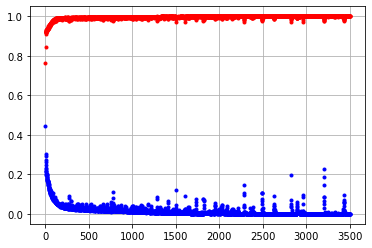

In [6]:
plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3)
plt.plot(x_len, y_loss, 'o', c='blue', markersize=3)
plt.grid()

plt.show()

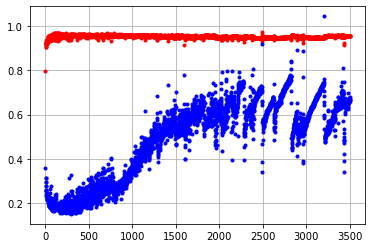

In [7]:
# 검증 정확도, 검증 손실도
plt.plot(x_len, y_val_accuracy, 'o', c='red', markersize=3)
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3)
plt.grid()

plt.show()

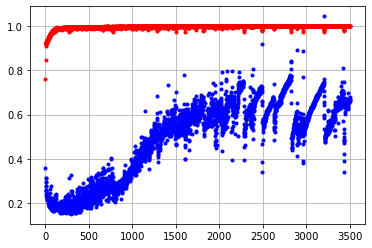

In [8]:
# 학습 정확도, 검증 손실도
plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3)
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3)
plt.grid()

plt.show()

In [ ]:
# Early Stopping

In [11]:
df = pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=0.15)

dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

stopper = EarlyStopping(monitor='val_loss', patience=200)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=50, callbacks=[stopper])

# 197번째 epoch의 모델이 아니라 마지막 모델만 남는다는 문제 발생

Epoch 1/3500
16/16 [==============================] - 1s 15ms/step - loss: 0.4360 - accuracy: 0.7654 - val_loss: 0.3302 - val_accuracy: 0.7846
Epoch 2/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8615 - val_loss: 0.2970 - val_accuracy: 0.9077
Epoch 3/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9141 - val_loss: 0.2821 - val_accuracy: 0.9077
Epoch 4/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.9192 - val_loss: 0.2609 - val_accuracy: 0.9333
Epoch 5/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.9321 - val_loss: 0.2499 - val_accuracy: 0.9282
Epoch 6/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.9359 - val_loss: 0.2405 - val_accuracy: 0.9333
Epoch 7/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9397 - val_loss: 0.2083 - val_accuracy: 0.9385
Epoch

16/16 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9628 - val_loss: 0.1176 - val_accuracy: 0.9590
Epoch 59/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9705 - val_loss: 0.1312 - val_accuracy: 0.9436
Epoch 60/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9718 - val_loss: 0.1321 - val_accuracy: 0.9436
Epoch 61/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9705 - val_loss: 0.1223 - val_accuracy: 0.9487
Epoch 62/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9654 - val_loss: 0.1430 - val_accuracy: 0.9436
Epoch 63/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0795 - accuracy: 0.9731 - val_loss: 0.1663 - val_accuracy: 0.9333
Epoch 64/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9705 - val_loss: 0.1296 - val_accuracy: 0.9436
Epoch 65/3500

Epoch 172/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9897 - val_loss: 0.0895 - val_accuracy: 0.9744
Epoch 173/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9872 - val_loss: 0.0950 - val_accuracy: 0.9590
Epoch 174/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.1023 - val_accuracy: 0.9590
Epoch 175/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0800 - val_accuracy: 0.9846
Epoch 176/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9756 - val_loss: 0.1614 - val_accuracy: 0.9385
Epoch 177/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9756 - val_loss: 0.0795 - val_accuracy: 0.9692
Epoch 178/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9910 - val_loss: 0.0822 - val_accuracy:

Epoch 229/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.1549 - val_accuracy: 0.9641
Epoch 230/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9885 - val_loss: 0.1478 - val_accuracy: 0.9641
Epoch 231/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9872 - val_loss: 0.1213 - val_accuracy: 0.9641
Epoch 232/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9923 - val_loss: 0.1070 - val_accuracy: 0.9590
Epoch 233/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9910 - val_loss: 0.1334 - val_accuracy: 0.9641
Epoch 234/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9885 - val_loss: 0.1049 - val_accuracy: 0.9641
Epoch 235/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9923 - val_loss: 0.1063 - val_accuracy:

Epoch 286/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9872 - val_loss: 0.1540 - val_accuracy: 0.9641
Epoch 287/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9910 - val_loss: 0.1626 - val_accuracy: 0.9641
Epoch 288/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1302 - val_accuracy: 0.9641
Epoch 289/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9910 - val_loss: 0.1076 - val_accuracy: 0.9641
Epoch 290/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9910 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 291/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9897 - val_loss: 0.1033 - val_accuracy: 0.9692
Epoch 292/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9923 - val_loss: 0.1060 - val_accuracy:

Epoch 343/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9910 - val_loss: 0.1607 - val_accuracy: 0.9641
Epoch 344/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9897 - val_loss: 0.1296 - val_accuracy: 0.9641
Epoch 345/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.1237 - val_accuracy: 0.9641
Epoch 346/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.1366 - val_accuracy: 0.9641
Epoch 347/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9987 - val_loss: 0.1114 - val_accuracy: 0.9641
Epoch 348/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9949 - val_loss: 0.1118 - val_accuracy: 0.9641
Epoch 349/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.1264 - val_accuracy:

In [ ]:
# EarlyStopping + ModelCheckpoint 함께 사용 필요

In [15]:
df = pd.read_csv('../data/wine.csv', header=None)
df = df.sample(frac=0.15)

dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

model_path = './model/{epoch:03d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                               save_best_only=True, verbose=0)


stopper = EarlyStopping(monitor='val_loss', patience=200)

model = Sequential()
model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=50, callbacks=[stopper])

Epoch 1/3500
16/16 [==============================] - 1s 16ms/step - loss: 0.4360 - accuracy: 0.7654 - val_loss: 0.3302 - val_accuracy: 0.7846
Epoch 2/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8615 - val_loss: 0.2970 - val_accuracy: 0.9077
Epoch 3/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9141 - val_loss: 0.2821 - val_accuracy: 0.9077
Epoch 4/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.9192 - val_loss: 0.2609 - val_accuracy: 0.9333
Epoch 5/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.9321 - val_loss: 0.2499 - val_accuracy: 0.9282
Epoch 6/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9359 - val_loss: 0.2405 - val_accuracy: 0.9333
Epoch 7/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.2099 - accuracy: 0.9397 - val_loss: 0.2083 - val_accuracy: 0.9385
Epoch

16/16 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9833 - val_loss: 0.1131 - val_accuracy: 0.9538
Epoch 116/3500
16/16 [==============================] - 0s 5ms/step - loss: 0.0441 - accuracy: 0.9872 - val_loss: 0.1006 - val_accuracy: 0.9590
Epoch 117/3500
16/16 [==============================] - 0s 6ms/step - loss: 0.0443 - accuracy: 0.9872 - val_loss: 0.0882 - val_accuracy: 0.9641
Epoch 118/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9821 - val_loss: 0.1110 - val_accuracy: 0.9538
Epoch 119/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9846 - val_loss: 0.1034 - val_accuracy: 0.9538
Epoch 120/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1419 - val_accuracy: 0.9538
Epoch 121/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.1551 - val_accuracy: 0.9538
Epoch 1

Epoch 172/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9897 - val_loss: 0.0895 - val_accuracy: 0.9744
Epoch 173/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9872 - val_loss: 0.0950 - val_accuracy: 0.9590
Epoch 174/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.1023 - val_accuracy: 0.9590
Epoch 175/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0800 - val_accuracy: 0.9846
Epoch 176/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9756 - val_loss: 0.1614 - val_accuracy: 0.9385
Epoch 177/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9756 - val_loss: 0.0795 - val_accuracy: 0.9692
Epoch 178/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9910 - val_loss: 0.0822 - val_accuracy:

Epoch 229/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.1549 - val_accuracy: 0.9641
Epoch 230/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9885 - val_loss: 0.1478 - val_accuracy: 0.9641
Epoch 231/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9872 - val_loss: 0.1213 - val_accuracy: 0.9641
Epoch 232/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9923 - val_loss: 0.1070 - val_accuracy: 0.9590
Epoch 233/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9910 - val_loss: 0.1334 - val_accuracy: 0.9641
Epoch 234/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9885 - val_loss: 0.1049 - val_accuracy: 0.9641
Epoch 235/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9923 - val_loss: 0.1063 - val_accuracy:

Epoch 286/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9872 - val_loss: 0.1540 - val_accuracy: 0.9641
Epoch 287/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9910 - val_loss: 0.1626 - val_accuracy: 0.9641
Epoch 288/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9833 - val_loss: 0.1302 - val_accuracy: 0.9641
Epoch 289/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9910 - val_loss: 0.1076 - val_accuracy: 0.9641
Epoch 290/3500
16/16 [==============================] - 0s 4ms/step - loss: 0.0180 - accuracy: 0.9910 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 291/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9897 - val_loss: 0.1033 - val_accuracy: 0.9692
Epoch 292/3500
16/16 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9923 - val_loss: 0.1060 - val_accuracy:

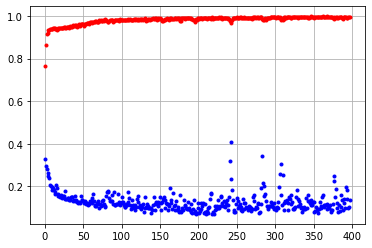

In [16]:
y_accuracy = history.history['accuracy']
y_val_loss = history.history['val_loss']
x_len = np.arange(1, len(history.history['loss']) + 1)

plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3)
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3)
plt.grid()

plt.show()

In [ ]:
'''
문제] 피마 인디언 데이터 셋을 이용하여 일반 모델을 생성하고 성능을 측정한 후
        베스트 모델을 선정하고 성능을 측정하여 그 차이를 보이는 코드를 작성하세요.
        베스트 모델은 그 결과를 그래프로 보이도록 합니다.
'''

In [27]:
df = pd.read_csv('../data/pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure',
                'thickness', 'insulin', 'bmi', 'pedigree', 'age', 'class'])

dataset = df.values
X = dataset[:,:8]
Y = dataset[:, 8]

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=seed)

model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 1s 6ms/step - loss: 1.7716 - accuracy: 0.5866 - val_loss: 0.7165 - val_accuracy: 0.6179
Epoch 2/500
50/50 [==============================] - 0s 2ms/step - loss: 0.7541 - accuracy: 0.6721 - val_loss: 0.6365 - val_accuracy: 0.7236
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 0.7219 - accuracy: 0.6415 - val_loss: 0.6642 - val_accuracy: 0.6829
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6314 - val_loss: 0.6703 - val_accuracy: 0.5854
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.6395 - val_loss: 0.8393 - val_accuracy: 0.5041
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7230 - val_loss: 0.5783 - val_accuracy: 0.7154
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6925 - val_loss: 0.5790 - val_accuracy: 0.6911
Epoch 8/500
5

Epoch 59/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7291 - val_loss: 0.5034 - val_accuracy: 0.7724
Epoch 60/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7556 - val_loss: 0.4825 - val_accuracy: 0.7886
Epoch 61/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7312 - val_loss: 0.5149 - val_accuracy: 0.7724
Epoch 62/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7739 - val_loss: 0.5822 - val_accuracy: 0.7480
Epoch 63/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7393 - val_loss: 0.5072 - val_accuracy: 0.7967
Epoch 64/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7251 - val_loss: 0.5131 - val_accuracy: 0.7724
Epoch 65/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7597 - val_loss: 0.5357 - val_accuracy: 0.7154
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8269 - val_loss: 0.5416 - val_accuracy: 0.7642
Epoch 174/500
50/50 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8269 - val_loss: 0.5297 - val_accuracy: 0.7154
Epoch 175/500
50/50 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8371 - val_loss: 0.5142 - val_accuracy: 0.7480
Epoch 176/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7841 - val_loss: 0.4701 - val_accuracy: 0.7642
Epoch 177/500
50/50 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8310 - val_loss: 0.5339 - val_accuracy: 0.7317
Epoch 178/500
50/50 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8310 - val_loss: 0.5466 - val_accuracy: 0.7967
Epoch 179/500
50/50 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8452 - val_loss: 0.5005 - val_accuracy: 0.7561
Epoch 180/500

50/50 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.8839 - val_loss: 0.6445 - val_accuracy: 0.7317
Epoch 288/500
50/50 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8126 - val_loss: 0.5031 - val_accuracy: 0.7724
Epoch 289/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.8635 - val_loss: 0.5408 - val_accuracy: 0.7805
Epoch 290/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8615 - val_loss: 0.5674 - val_accuracy: 0.7805
Epoch 291/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8676 - val_loss: 0.5804 - val_accuracy: 0.7317
Epoch 292/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.5444 - val_accuracy: 0.7642
Epoch 293/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8697 - val_loss: 0.5917 - val_accuracy: 0.7886
Epoch 294/500

50/50 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.8859 - val_loss: 0.6686 - val_accuracy: 0.7561
Epoch 345/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.8961 - val_loss: 0.8099 - val_accuracy: 0.7317
Epoch 346/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9002 - val_loss: 0.7950 - val_accuracy: 0.7398
Epoch 347/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9022 - val_loss: 0.7109 - val_accuracy: 0.7398
Epoch 348/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9063 - val_loss: 0.7911 - val_accuracy: 0.7398
Epoch 349/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.8900 - val_loss: 0.6860 - val_accuracy: 0.7480
Epoch 350/500
50/50 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.8900 - val_loss: 0.7105 - val_accuracy: 0.7154
Epoch 351/500

50/50 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9511 - val_loss: 0.8023 - val_accuracy: 0.7561
Epoch 459/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9409 - val_loss: 0.8067 - val_accuracy: 0.7398
Epoch 460/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9470 - val_loss: 0.8157 - val_accuracy: 0.7642
Epoch 461/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9593 - val_loss: 0.8133 - val_accuracy: 0.7317
Epoch 462/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.9430 - val_loss: 0.8428 - val_accuracy: 0.7724
Epoch 463/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9552 - val_loss: 0.8884 - val_accuracy: 0.7480
Epoch 464/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9470 - val_loss: 0.7804 - val_accuracy: 0.7561
Epoch 465/500

In [28]:
result1 = model.evaluate(X_train, Y_train, verbose=0)
result2 = model.evaluate(X_test, Y_test, verbose=0)

print('학습 성능:', result1)
print('검증 성능:', result2)

학습 성능: [0.25218960642814636, 0.9283387660980225]
검증 성능: [1.650504231452942, 0.701298713684082]


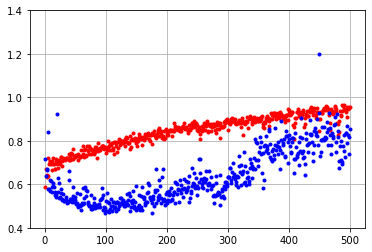

In [31]:
y_accuracy = history.history['accuracy']
y_val_loss = history.history['val_loss']
x_len = np.arange(1, len(history.history['loss']) + 1)

plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3)
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3)
plt.ylim(0.4, 1.4)
plt.grid()

plt.show()

In [32]:
df = pd.read_csv('../data/pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure',
                'thickness', 'insulin', 'bmi', 'pedigree', 'age', 'class'])

dataset = df.values
X = dataset[:,:8]
Y = dataset[:, 8]

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=seed)

model_path = './model/{epoch:03d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                               save_best_only=True, verbose=0)
stopper = EarlyStopping(monitor='val_loss', patience=200)


model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=3500, batch_size=10, callbacks=[checkpointer, stopper])

Epoch 1/3500
50/50 [==============================] - 1s 14ms/step - loss: 1.7716 - accuracy: 0.5866 - val_loss: 0.7165 - val_accuracy: 0.6179
Epoch 2/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.7541 - accuracy: 0.6721 - val_loss: 0.6365 - val_accuracy: 0.7236
Epoch 3/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.7219 - accuracy: 0.6415 - val_loss: 0.6642 - val_accuracy: 0.6829
Epoch 4/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6314 - val_loss: 0.6703 - val_accuracy: 0.5854
Epoch 5/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.6395 - val_loss: 0.8393 - val_accuracy: 0.5041
Epoch 6/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7230 - val_loss: 0.5783 - val_accuracy: 0.7154
Epoch 7/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6925 - val_loss: 0.5790 - val_accuracy: 0.6911
Epoch

50/50 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.7943 - val_loss: 0.4977 - val_accuracy: 0.8049
Epoch 116/3500
50/50 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7760 - val_loss: 0.5126 - val_accuracy: 0.7480
Epoch 117/3500
50/50 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.7882 - val_loss: 0.4776 - val_accuracy: 0.7398
Epoch 118/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7475 - val_loss: 0.5208 - val_accuracy: 0.7236
Epoch 119/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7943 - val_loss: 0.5175 - val_accuracy: 0.7154
Epoch 120/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7678 - val_loss: 0.4884 - val_accuracy: 0.7724
Epoch 121/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8106 - val_loss: 0.4988 - val_accuracy: 0.7561
Epoch 1

Epoch 172/3500
50/50 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.7984 - val_loss: 0.5378 - val_accuracy: 0.7154
Epoch 173/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8269 - val_loss: 0.5416 - val_accuracy: 0.7642
Epoch 174/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8269 - val_loss: 0.5297 - val_accuracy: 0.7154
Epoch 175/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8371 - val_loss: 0.5142 - val_accuracy: 0.7480
Epoch 176/3500
50/50 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7841 - val_loss: 0.4701 - val_accuracy: 0.7642
Epoch 177/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8310 - val_loss: 0.5339 - val_accuracy: 0.7317
Epoch 178/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8310 - val_loss: 0.5466 - val_accuracy:

Epoch 229/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.8798 - val_loss: 0.6257 - val_accuracy: 0.7724
Epoch 230/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8554 - val_loss: 0.5764 - val_accuracy: 0.7642
Epoch 231/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8615 - val_loss: 0.6133 - val_accuracy: 0.7561
Epoch 232/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8595 - val_loss: 0.5631 - val_accuracy: 0.7154
Epoch 233/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8554 - val_loss: 0.5754 - val_accuracy: 0.7236
Epoch 234/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8432 - val_loss: 0.5894 - val_accuracy: 0.7154
Epoch 235/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8371 - val_loss: 0.6118 - val_accuracy:

Epoch 286/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8839 - val_loss: 0.5556 - val_accuracy: 0.7642
Epoch 287/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.8839 - val_loss: 0.6445 - val_accuracy: 0.7317
Epoch 288/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8126 - val_loss: 0.5031 - val_accuracy: 0.7724
Epoch 289/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2769 - accuracy: 0.8635 - val_loss: 0.5408 - val_accuracy: 0.7805
Epoch 290/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8615 - val_loss: 0.5674 - val_accuracy: 0.7805
Epoch 291/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8676 - val_loss: 0.5804 - val_accuracy: 0.7317
Epoch 292/3500
50/50 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8656 - val_loss: 0.5444 - val_accuracy:

In [33]:
best_model = load_model('./model/098-0.4690.hdf5')
result1 = model.evaluate(X_train, Y_train, verbose=0)
result2 = model.evaluate(X_test, Y_test, verbose=0)

print('학습 성능:', result1)
print('검증 성능:', result2)

학습 성능: [0.2952205240726471, 0.861563503742218]
검증 성능: [1.0874449014663696, 0.701298713684082]


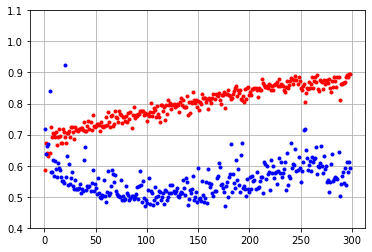

In [35]:
y_accuracy = history.history['accuracy']
y_val_loss = history.history['val_loss']
x_len = np.arange(1, len(history.history['loss']) + 1)

plt.plot(x_len, y_accuracy, 'o', c='red', markersize=3)
plt.plot(x_len, y_val_loss, 'o', c='blue', markersize=3)
plt.ylim(0.4, 1.1)
plt.grid()

plt.show()